In [ ]:

import pandas as pd

# Load dataset from Kaggle CSV
df = pd.read_csv('fetal_health.csv')

# Basic info
print(df.head())
print(df.info())
print(df.describe())
print(df['fetal_health'].value_counts())


   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

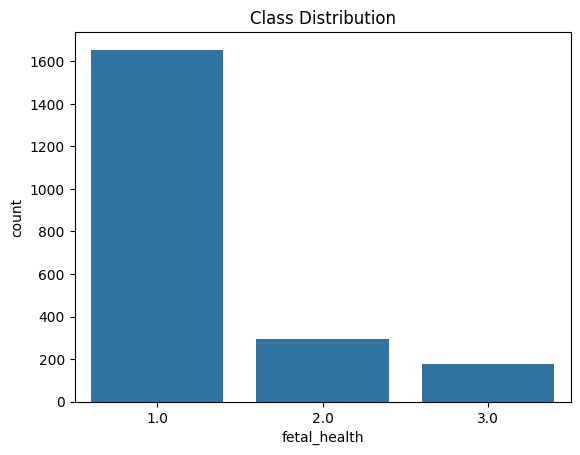

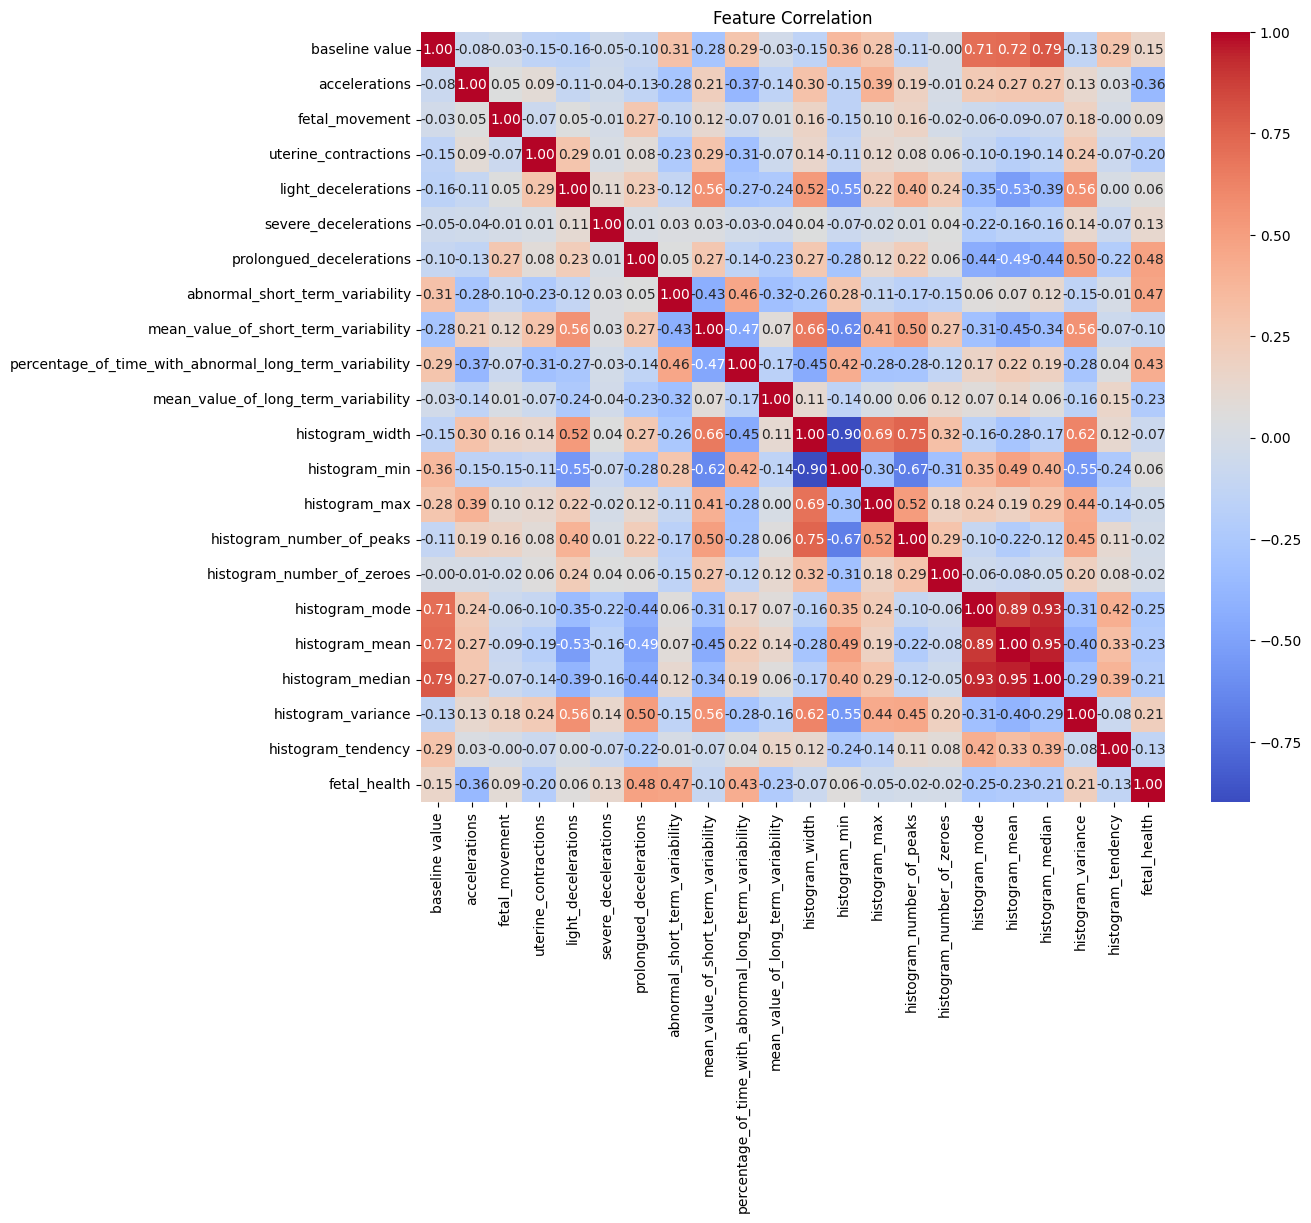

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of fetal health classes
sns.countplot(x='fetal_health', data=df)
plt.title("Class Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

Logistic Regression Report:
               precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       332
         2.0       0.61      0.68      0.64        59
         3.0       0.88      0.66      0.75        35

    accuracy                           0.88       426
   macro avg       0.81      0.76      0.78       426
weighted avg       0.89      0.88      0.89       426

Random Forest Report:
               precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       332
         2.0       0.83      0.68      0.75        59
         3.0       0.85      0.83      0.84        35

    accuracy                           0.92       426
   macro avg       0.88      0.83      0.85       426
weighted avg       0.92      0.92      0.92       426



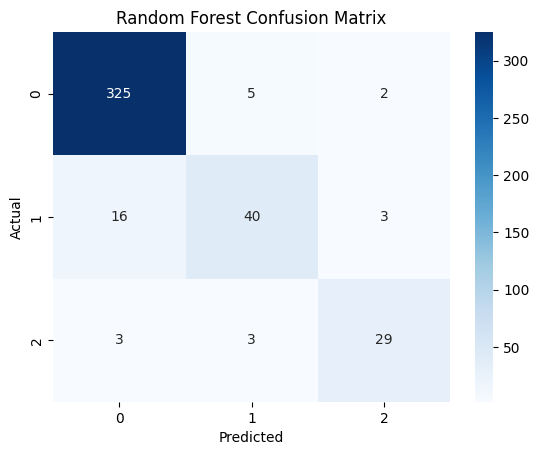

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix Example (Random Forest)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


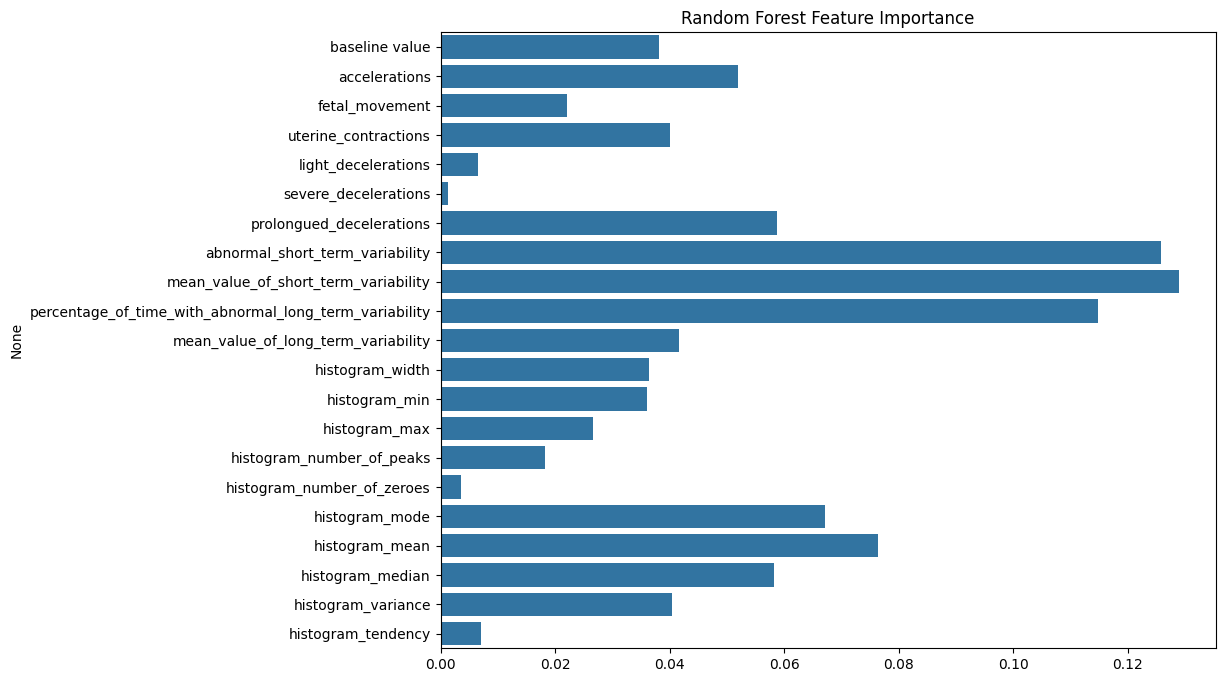

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,8))
sns.barplot(x=feature_importances, y=features)
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:

# Example textual insights
print("""
Insights:
1. Key features influencing fetal health include:
   - baseline_value
   - accelerations
   - fetal_movement
   - uterine_contractions
2. Random Forest outperforms Logistic Regression for this dataset.
3. Misclassified cases suggest some overlap between classes 2 (suspect) and 3 (pathological).
4. Next step: Hyperparameter tuning, try XGBoost or ensemble methods for higher accuracy.
""")



Insights:
1. Key features influencing fetal health include:
   - baseline_value
   - accelerations
   - fetal_movement
   - uterine_contractions
2. Random Forest outperforms Logistic Regression for this dataset.
3. Misclassified cases suggest some overlap between classes 2 (suspect) and 3 (pathological).
4. Next step: Hyperparameter tuning, try XGBoost or ensemble methods for higher accuracy.

